# BitTiger DS501 Week5

1. [Natural Languate Processing](#Natural-Languate-Processing)
2. [New York Times Article Analysis](#New-York-Times-Article-Analysis)
3. [KMeans](#KMeans)
4. [Clustering text data](#Clustering-text-data)

# Natural Languate Processing

* NLP 就是要從 unstructed text 中提取 feature vector
* Schema 就是 structured 的資料
  * 有欄位 --> 有 schema --> structured data
  * 沒有欄位 --> 沒有 schema --> unstructured data

In [1]:
from collections import Counter
import numpy as np

### Documents

Document 可以是一個單字，一個句子，一段文章等等

In [2]:
doc1 = 'Wise people think they are foolish'
doc2 = 'Foolish foolish people think they are wise wise'
doc3 = 'I am definitely wise so this irritates me'
doc4 = 'Trump is for sure like definitely foolish'

### Create Corpus

把 documents 集合在一起就叫做 corpus

In [3]:
documents = [doc1, doc2, doc3, doc4]

### Tokenize and lower case

把單字放到 list 中的過程就叫做 tokenize，list 中的一個單字或標點符號就是一個 token

全部都換成小寫，大小寫統一才不會因為大小寫不同，被判定成不同的單字

In [4]:
from nltk.tokenize import word_tokenize

tokenized = [word_tokenize(doc.lower()) for doc in documents]
tokenized

[['wise', 'people', 'think', 'they', 'are', 'foolish'],
 ['foolish', 'foolish', 'people', 'think', 'they', 'are', 'wise', 'wise'],
 ['i', 'am', 'definitely', 'wise', 'so', 'this', 'irritates', 'me'],
 ['trump', 'is', 'for', 'sure', 'like', 'definitely', 'foolish']]

### Stop words

Stop words 就是出現頻率太高，又沒什麼特別意義的文字，像是 the, a, of 等等

In [5]:
from nltk.corpus import stopwords

stop = set(stopwords.words('english')) # 指明用英文中的 stop words

In [6]:
docs = [[word for word in words if  word not in stop] for words in tokenized] # words 是一個列 word 是該列的一個單字
docs # 會把 stop words 移除

[['wise', 'people', 'think', 'foolish'],
 ['foolish', 'foolish', 'people', 'think', 'wise', 'wise'],
 ['definitely', 'wise', 'irritates'],
 ['trump', 'sure', 'like', 'definitely', 'foolish']]

### Stemming and Lemmatization

Stemming 就是依照規則截斷文字，例如 s, ing, ly 等結尾的單字就把 s, ing, ly 去掉，可能剩下的字根並不是一個真正的英文單字

Lemmatization 是依照字典找出原型單字，因為要查字典，所以速度就比較慢，但是效果比較好

In [7]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter = PorterStemmer()
wordnet = WordNetLemmatizer()

print(porter.stem('mice')) # 笨蛋判斷
print(wordnet.lemmatize('mice')) # 會找字典對照，找出適當的原形單字

mice
mouse


In [8]:
docs_stem = [[porter.stem(word) for word in words] for words in docs]
docs_stem

[['wise', 'peopl', 'think', 'foolish'],
 ['foolish', 'foolish', 'peopl', 'think', 'wise', 'wise'],
 ['definit', 'wise', 'irrit'],
 ['trump', 'sure', 'like', 'definit', 'foolish']]

In [9]:
docs_lemma = [[wordnet.lemmatize(word) for word in words] for words in docs]
docs_lemma # 效果比較好

[['wise', 'people', 'think', 'foolish'],
 ['foolish', 'foolish', 'people', 'think', 'wise', 'wise'],
 ['definitely', 'wise', 'irritates'],
 ['trump', 'sure', 'like', 'definitely', 'foolish']]

### Vocabulary

Corpus 中的所有單字，經過 Stemming 或 lemmatization 之後剩下的單字，就是 vocabulary

vocabulary 當成 feature 在用

vocabulary 中單字的順序很重要，所以要經過排序

In [10]:
vocab = [word for doc in docs_lemma for word in doc] # 先看 for doc in docs_lemma 挑出 doc 後才看 for word in doc
vocab # 包含了全部的單字

['wise',
 'people',
 'think',
 'foolish',
 'foolish',
 'foolish',
 'people',
 'think',
 'wise',
 'wise',
 'definitely',
 'wise',
 'irritates',
 'trump',
 'sure',
 'like',
 'definitely',
 'foolish']

`set()` 本身不會排序，所以要用 `sorted()` 來排序

In [11]:
vocab = sorted(list(set(vocab))) # 挑出 unique 的單字放入 list 中排序
print('Vocabulary (features):', vocab)

Vocabulary (features): ['definitely', 'foolish', 'irritates', 'like', 'people', 'sure', 'think', 'trump', 'wise']


#### 解釋：
* Corpus: document 的集合
  * 把 documents 放在 list 中
* Document: 可以是一個字，一個句子，一段文章等等
* Token: 一個 document 裡面的單字或標點符號
  * 把 document 拆成 token 的過程叫做 tokenization
  * 通通轉成小寫
* Vocabulary: corpus 中所有獨立的單字
  * 這些單字已經經過了 stemming 或 lemmatization 的處理，也移除了 stop words 和多餘的空白與標點符號
  * 要排序，放在 list 中

#### 基本流程：
1. 把 documents 拆成一個一個的 token (包含單字和標點符號) 並且放到 list 中，這個步驟叫做 **tokenization**
2. 把 tokens 全變成小寫
   * 步驟 1 和步驟 2 順序可以對調，也可以一起做
3. 把無意義的多餘空白，還有標點符號去掉
4. 把 stop words 去掉
5. 做 stemming 或 lemmatization 讓不同形式的單字變成原始的形式
   * 形式統一才不會有因為單複數，詞類變化而被認為是不同的單字
6. 放到 vocabulary 中，然後記得要排序
   * 在 vocabulary 中的單字就是 features 

### Bag of words

每一個 document 中的每一個單字，在 vocabulary 中出現的次數

In [12]:
def bow_vectorize(doc, vocab):
    bag_of_words = Counter(doc) # 是一個 dict，key 是單字，value 是單字在 doc 中出現的次數
    doc_vector = np.zeros(len(vocab))
    for word_idx, word in enumerate(vocab):
        if word in bag_of_words:
            doc_vector[word_idx] += bag_of_words[word]
    return doc_vector

用 bag of words 做一個大表格，計算每個單字在每個 document 中出現的次數

一個列就是一個 bag of words

| documents | definitely | foolish | irritates | like | people | sure | think | trump | wise |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|['wise', 'people', 'think', 'foolish']|0|1|0|0|1|0|1|0|1|
|['foolish', 'foolish', 'people', 'think', 'wise', 'wise']|0|2|0|0|1|0|1|0|2|
|['definitely', 'wise', 'irritates']|1|0|1|0|0|0|0|0|1|
|['trump', 'sure', 'like', 'definitely', 'foolish']|1|1|0|1|0|1|0|1|0|

In [13]:
bow_matrix = list()
for doc in docs_lemma:
    bow_matrix.append(bow_vectorize(doc, vocab))

print('features:', vocab)

for i in range(len(bow_matrix)):
    print('"%s":' % docs_lemma[i], '\n', bow_matrix[i], '\n')
    
print('feature matrix:')
print(bow_matrix)

features: ['definitely', 'foolish', 'irritates', 'like', 'people', 'sure', 'think', 'trump', 'wise']
"['wise', 'people', 'think', 'foolish']": 
 [0. 1. 0. 0. 1. 0. 1. 0. 1.] 

"['foolish', 'foolish', 'people', 'think', 'wise', 'wise']": 
 [0. 2. 0. 0. 1. 0. 1. 0. 2.] 

"['definitely', 'wise', 'irritates']": 
 [1. 0. 1. 0. 0. 0. 0. 0. 1.] 

"['trump', 'sure', 'like', 'definitely', 'foolish']": 
 [1. 1. 0. 1. 0. 1. 0. 1. 0.] 

feature matrix:
[array([0., 1., 0., 0., 1., 0., 1., 0., 1.]), array([0., 2., 0., 0., 1., 0., 1., 0., 2.]), array([1., 0., 1., 0., 0., 0., 0., 0., 1.]), array([1., 1., 0., 1., 0., 1., 0., 1., 0.])]


### Bag of words with CountVectorizer

前面是自己寫程式找出 bag of words，這邊是直接使用 scikit-learn 來找

In [14]:
def lemmatize(doc):
    return [wordnet.lemmatize(word) for word in word_tokenize(doc.lower())]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words=stopwords.words('english'),
                                   vocabulary=vocab,
                                   tokenizer=lemmatize) # 依照 vocabulary 和 lemmatize 的方式做出一個 bag-of-words

feature_matrix = count_vectorizer.fit_transform([doc1])
print(feature_matrix) # 是一個 sparse matrix

feature_matrix.toarray()
print(feature_matrix.toarray())

  (0, 1)	1
  (0, 4)	1
  (0, 6)	1
  (0, 8)	1
[[0 1 0 0 1 0 1 0 1]]


/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  sorted(inconsistent))


In [16]:
print('Vectorize:', doc1)
print('Lemmatized:', docs_lemma[0])
print('Features:', vocab)
print('\n')
print('sklearn result:\n', feature_matrix)
print('our result', bow_vectorize(docs_lemma[0], vocab))
print('\n')
print('feature matrix')
print(count_vectorizer.fit_transform(documents).todense())

Vectorize: Wise people think they are foolish
Lemmatized: ['wise', 'people', 'think', 'foolish']
Features: ['definitely', 'foolish', 'irritates', 'like', 'people', 'sure', 'think', 'trump', 'wise']


sklearn result:
   (0, 1)	1
  (0, 4)	1
  (0, 6)	1
  (0, 8)	1
our result [0. 1. 0. 0. 1. 0. 1. 0. 1.]


feature matrix
[[0 1 0 0 1 0 1 0 1]
 [0 2 0 0 1 0 1 0 2]
 [1 0 1 0 0 0 0 0 1]
 [1 1 0 1 0 1 0 1 0]]


#### Bag-of-words 的缺點
1. 比較長的 document 權重會比較短的還重
2. 出現較少次數的單字應該要有較高的權重
3. 失去了文章結構所帶有的資訊

### Term frequency (Tf)

每一個 document 中的每一個單字，在 vocabulary 中出現的次數 (就是 bag of words) 除以 bag of words 的單字數目

Tf 其實就是歸一過後的 bag of words

In [17]:
def tf_vectorize(doc, vocab):
    bow_vector = bow_vectorize(doc, vocab)
    tf_vector = np.zeros(len(vocab))
    for idx, vec in enumerate(bow_vector):
        tf_vector[idx] = vec / len(doc)
    return tf_vector

In [18]:
tf_matrix = list()
for doc in docs_lemma:
    tf_matrix.append(tf_vectorize(doc, vocab))

做出來的 tf 表格會長這樣

| documents | definitely | foolish | irritates | like | people | sure | think | trump | wise |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|['wise', 'people', 'think', 'foolish']|0|1/4|0|0|1/4|0|1/4|0|1/4|
|['foolish', 'foolish', 'people', 'think', 'wise', 'wise']|0|2/6|0|0|1/6|0|1/6|0|2/6|
|['definitely', 'wise', 'irritates']|1/3|0|1/3|0|0|0|0|0|1/3|
|['trump', 'sure', 'like', 'definitely', 'foolish']|1/5|1/5|0|1/5|0|1/5|0|1/5|0|

In [19]:
print('features:', vocab)

for i in range(len(tf_matrix)):
    print('"%s":' % docs_lemma[i], '\n', tf_matrix[i], '\n')

features: ['definitely', 'foolish', 'irritates', 'like', 'people', 'sure', 'think', 'trump', 'wise']
"['wise', 'people', 'think', 'foolish']": 
 [0.   0.25 0.   0.   0.25 0.   0.25 0.   0.25] 

"['foolish', 'foolish', 'people', 'think', 'wise', 'wise']": 
 [0.         0.33333333 0.         0.         0.16666667 0.
 0.16666667 0.         0.33333333] 

"['definitely', 'wise', 'irritates']": 
 [0.33333333 0.         0.33333333 0.         0.         0.
 0.         0.         0.33333333] 

"['trump', 'sure', 'like', 'definitely', 'foolish']": 
 [0.2 0.2 0.  0.2 0.  0.2 0.  0.2 0. ] 



### Inverse document frequency (idf)

* 主要是要增加出現較少的次數的單字的權重
* 計算公式：
\begin{equation}
idf = \log(\frac{N}{n})
\end{equation}
或
\begin{equation}
idf = \log(\frac{N}{n+1})
\end{equation}
其中 $N$ = 全部的 document 數目, $n$= 有幾個 document 出現這個單字
  * 這邊應該是用自然對數 $\ln()$
  * $N$ 和 $n$ 都是算幾個 document
    * 因為這邊是計算 document 的數目，如果一個單字在某個 document 中出現很多次，仍然只計為一個 document
  * 分母要 +1 預防出現除以 0 的情形
* 用 idf 的話就不用在乎 stop words 因為 stop words 出現的頻率很高，$n$ 會很大，$N/n$ 就會接近 1，而 $\log(1) = 0$
* 越稀有的單字，idf 的值就會越大，表示這個字越重要

*bag-of-words*

| documents | definitely | foolish | irritates | like | people | sure | think | trump | wise |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|['wise', 'people', 'think', 'foolish']|0|1|0|0|1|0|1|0|1|
|['foolish', 'foolish', 'people', 'think', 'wise', 'wise']|0|2|0|0|1|0|1|0|2|
|['definitely', 'wise', 'irritates']|1|0|1|0|0|0|0|0|1|
|['trump', 'sure', 'like', 'definitely', 'foolish']|1|1|0|1|0|1|0|1|0|
|N=4|n=2|n=3|n=1|n=1|n=2|n=1|n=2|n=1|n=3|

#### scikit-learn 實作 idf
* if `smooth_idf=False` \begin{equation}idf(d, t) = \ln (\frac{N}{n}) + 1\end{equation}
* if `smooth_idf=True` \begin{equation}idf(d, t) = \ln (\frac{1 + N}{1 + n}) + 1\end{equation}


### Tf-Idf

Tf-idf 就是 tf 乘上權重 idf
* 重要的單字 idf 大，不重要的單字 idf 小
* stop words 的 idf 很小
  * 可以不用在意 stop words
  * 要加速效能的話，可以先移除 stop words

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'),
                                   vocabulary=vocab)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents).todense() # 這邊直接拿 corpus 來做 tfidf

print(tfidf_matrix)

[[0.         0.44493104 0.         0.         0.54957835 0.
  0.54957835 0.         0.44493104]
 [0.         0.60161783 0.         0.         0.37155886 0.
  0.37155886 0.         0.60161783]
 [0.55349232 0.         0.70203482 0.         0.         0.
  0.         0.         0.44809973]
 [0.39278432 0.31799276 0.         0.49819711 0.         0.49819711
  0.         0.49819711 0.        ]]


In [21]:
print('features:', vocab)

for i in range(len(tfidf_matrix)):
    print('"%s":' % docs_lemma[i], '\n', tfidf_matrix[i], '\n')

features: ['definitely', 'foolish', 'irritates', 'like', 'people', 'sure', 'think', 'trump', 'wise']
"['wise', 'people', 'think', 'foolish']": 
 [[0.         0.44493104 0.         0.         0.54957835 0.
  0.54957835 0.         0.44493104]] 

"['foolish', 'foolish', 'people', 'think', 'wise', 'wise']": 
 [[0.         0.60161783 0.         0.         0.37155886 0.
  0.37155886 0.         0.60161783]] 

"['definitely', 'wise', 'irritates']": 
 [[0.55349232 0.         0.70203482 0.         0.         0.
  0.         0.         0.44809973]] 

"['trump', 'sure', 'like', 'definitely', 'foolish']": 
 [[0.39278432 0.31799276 0.         0.49819711 0.         0.49819711
  0.         0.49819711 0.        ]] 



### Euclidian distance

計算兩個向量之間的幾何距離

\begin{equation} d(\vec{A}, \vec{B}) = \sqrt{\sum_{i=1}^{n} (A_{i} - B_{i})^{2}} \end{equation}

* 幾何距離越小 (越接近) 就是越相似
* 因為沒有 normalization，所以比較不穩定

In [22]:
from sklearn.metrics.pairwise import euclidean_distances

In [23]:
bow_matrix[0]

array([0., 1., 0., 0., 1., 0., 1., 0., 1.])

In [24]:
bow_matrix[1]

array([0., 2., 0., 0., 1., 0., 1., 0., 2.])

bow_matrix[0].shape = (9, )

bow_matrix[0].reshape(1, -1).shape = (1, 9)

要 reshpae 才能形成一個 1x9 的向量

#### 比較 bag-of-words

In [25]:
print('Compare "%s" \nwith "%s"' % (doc1, doc2))
print(euclidean_distances(bow_matrix[0].reshape(1, -1), bow_matrix[1].reshape(1, -1)))

Compare "Wise people think they are foolish" 
with "Foolish foolish people think they are wise wise"
[[1.41421356]]


#### 比較 tf

In [26]:
print('Compare "%s" \nwith "%s"' % (doc1, doc2))
print(euclidean_distances(tf_matrix[0].reshape(1, -1), tf_matrix[1].reshape(1, -1)))

Compare "Wise people think they are foolish" 
with "Foolish foolish people think they are wise wise"
[[0.16666667]]


#### 比較 tf-idf

In [27]:
print('Compare "%s" \nwith "%s"' % (doc1, doc2))
print(euclidean_distances(tfidf_matrix[0].reshape(1, -1), tfidf_matrix[1].reshape(1, -1)))

Compare "Wise people think they are foolish" 
with "Foolish foolish people think they are wise wise"
[[0.33538543]]


用相同的兩個 documents 分別比較 bag-of-words, tf, 和 tf-idf 時的 euclidean distance 的結果都不同，所以不穩定

### Cosine similarity

\begin{equation}
\textrm{Cosine similarity} = \frac{\vec{A}\cdot\vec{B}}{||A||\ ||B||}
= \frac{\sum_{i=1}^{n} A_{i}B_{i}}{ \sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}} }
\end{equation}

* 因為 cosine 是將 $\vec{A}$ 向量投影到 $\vec{B}$ 向量上，所以 cosine similarity 越大表示越相似
* Cosine similarity 和 feature vector 的 scale 不相關
  * 因為有 normalization 所以和文章長短就無關了
  * 比較穩定

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

#### 比較 bag-of-words

In [29]:
print('Compare "%s" \nwith "%s"' % (doc1, doc2))
print(cosine_similarity(bow_matrix[0].reshape(1, -1), bow_matrix[1].reshape(1, -1)))

Compare "Wise people think they are foolish" 
with "Foolish foolish people think they are wise wise"
[[0.9486833]]


#### 比較 tf

In [30]:
print('Compare "%s" \nwith "%s"' % (doc1, doc2))
print(cosine_similarity(tf_matrix[0].reshape(1, -1), tf_matrix[1].reshape(1, -1)))

Compare "Wise people think they are foolish" 
with "Foolish foolish people think they are wise wise"
[[0.9486833]]


#### 比較 tf-idf

In [31]:
print('Compare "%s" \nwith "%s"' % (doc1, doc2))
print(cosine_similarity(tfidf_matrix[0].reshape(1, -1), tfidf_matrix[1].reshape(1, -1)))

Compare "Wise people think they are foolish" 
with "Foolish foolish people think they are wise wise"
[[0.94375831]]


用相同的兩個 documents 分別比較 bag-of-words, tf, 和 tf-idf 時的 cosine silimarity 的結果都差不多，所以穩定

### Search Engine Query Example

In [32]:
query = 'The foolish Trump'

query_vectorized = tfidf_vectorizer.transform([query]).todense()
print('Query:', query)
print('Vectorized query:', query_vectorized)

Query: The foolish Trump
Vectorized query: [[0.         0.53802897 0.         0.         0.         0.
  0.         0.84292635 0.        ]]


In [33]:
for doc, tf_doc in zip(documents, tfidf_matrix):
    print(doc, cosine_similarity(query_vectorized.reshape(1, -1), tf_doc.reshape(1, -1)))

Wise people think they are foolish [[0.23938579]]
Foolish foolish people think they are wise wise [[0.32368782]]
I am definitely wise so this irritates me [[0.]]
Trump is for sure like definitely foolish [[0.59103279]]


### A final Cosine Similarity Thing

In [34]:
for index in range(len(documents[1:])):
    print('"%s" compared with "%s"' % (documents[0], documents[index+1]))
    print('TF cosine similarity:', cosine_similarity(tf_matrix[0].reshape(1, -1),
                                                     tf_matrix[index+1].reshape(1, -1)))
    print('TF-IDF cosine similarity:', cosine_similarity(tfidf_matrix[0].reshape(1, -1),
                                                         tfidf_matrix[index+1].reshape(1, -1)))

"Wise people think they are foolish" compared with "Foolish foolish people think they are wise wise"
TF cosine similarity: [[0.9486833]]
TF-IDF cosine similarity: [[0.94375831]]
"Wise people think they are foolish" compared with "I am definitely wise so this irritates me"
TF cosine similarity: [[0.28867513]]
TF-IDF cosine similarity: [[0.19937348]]
"Wise people think they are foolish" compared with "Trump is for sure like definitely foolish"
TF cosine similarity: [[0.2236068]]
TF-IDF cosine similarity: [[0.14148485]]


***
***
***

# New York Times Article Analysis

### Natural Language Processing

In [35]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import nltk.data
import numpy as np

In [36]:
categories = ['comp.graphics', 'rec.sport.baseball', 'sci.med', 'talk.politics.misc']
newsgroups = fetch_20newsgroups(subset='train', categories=categories) 
data = newsgroups.data

In [37]:
print(type(newsgroups)) # newsgroups 是一個 dict (Bunch 就是 dict)
print(newsgroups.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [38]:
type(data), len(data)

(list, 2240)

In [39]:
data[0]

'From: geb@cs.pitt.edu (Gordon Banks)\nSubject: Re: Name of MD\'s eyepiece?\nReply-To: geb@cs.pitt.edu (Gordon Banks)\nOrganization: Univ. of Pittsburgh Computer Science\nLines: 13\n\nIn article <C4IHM2.Gs9@watson.ibm.com> clarke@watson.ibm.com (Ed Clarke) writes:\n>|> |It\'s not an eyepiece.  It is called a head mirror.  All doctors never\n>\n>A speculum?\n\nThe speculum is the little cone that fits on the end of the otoscope.\nThere are also vaginal specula that females and gynecologists are\nall too familiar with.\n-- \n----------------------------------------------------------------------------\nGordon Banks  N3JXP      | "Skepticism is the chastity of the intellect, and\ngeb@cadre.dsl.pitt.edu   |  it is shameful to surrender it too soon." \n----------------------------------------------------------------------------\n'

In [40]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [41]:
from string import punctuation

In [42]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [43]:
print(SnowballStemmer('english').stem('running'))
print(WordNetLemmatizer().lemmatize('caused'))

run
caused


In [44]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
vectors = vectorizer.fit_transform(data).toarray() # vectors 是一個 tf-idf 的表格
words = vectorizer.get_feature_names()

In [45]:
vectors.shape # 有 2240 個 documents 和 2000 個 feature

(2240, 2000)

In [46]:
words

['00',
 '000',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '10',
 '100',
 '11',
 '12',
 '128',
 '129',
 '13',
 '130',
 '14',
 '15',
 '150',
 '16',
 '17',
 '18',
 '19',
 '192',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1993apr13',
 '1993apr14',
 '1993apr15',
 '1993apr16',
 '1993apr17',
 '1993apr19',
 '1993apr5',
 '1993apr6',
 '20',
 '200',
 '21',
 '22',
 '23',
 '24',
 '241',
 '25',
 '250',
 '256',
 '26',
 '27',
 '28',
 '286',
 '29',
 '2b',
 '2d',
 '2nd',
 '30',
 '300',
 '31',
 '312',
 '32',
 '33',
 '333',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '3d',
 '3do',
 '40',
 '400',
 '408',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '48',
 '49',
 '50',
 '500',
 '51',
 '52',
 '53',
 '54',
 '56',
 '59',
 '60',
 '61',
 '617',
 '64',
 '65',
 '70',
 '75',
 '80',
 '800',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '95',
 '9760',
 '__',
 '___',
 '____',
 'aaa',
 'ab',
 'ability',
 'able',
 'abortion',
 'absolutely',
 'abuse',
 'ac',
 'academic',
 'accept',
 'accepted',
 'access',
 

In [47]:
def get_top_values(lst, n, labels):
    '''
    Input: list, integer, list
    Output: list
    
    Given a list of values,, find the indices with the highest n values.
    Return the labels for each of these indices
    
    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ['cat', 'dog', 'mouse', 'pig', 'rabbit']
    output = ['cat', 'pig']
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]

In [48]:
avg = np.sum(vectors, axis=0) / np.sum(vectors > 0, axis=0) # 算每一個欄位的平均值
print('top 10 by average tf-idf')
print(get_top_values(avg, 10, words)) # 找出前十名的 tf-idf 所對應到的 features 是什麼

top 10 by average tf-idf
['limbaugh', 'jb', 'mwra', 'radiosity', 'zisfein', 'oswego', 'stephanopoulos', 'den', 'journalism', 'crohn']


In [49]:
total = np.sum(vectors, axis=0)
print('top 10 by total tf-idf')
print(get_top_values(total, 10, words))

top 10 by total tf-idf
['edu', 'com', 'subject', 'lines', 'organization', 'article', 'writes', 'university', 'cs', 'posting']


In [50]:
# redo vectorization without using idf
vectorizer2 = TfidfVectorizer(use_idf=False, max_features=2000)

# make documents into one giant document for this purpose
vectors2 = vectorizer2.fit_transform(['\n'.join(data)]).toarray() # 把 data 這個 list 的內容合併成一個很大的 document 然後做出一個 tf-idf 表格

print('top 10 by tf across all corpus')
print(get_top_values(vectors2[0], 10, words))

top 10 by tf across all corpus
['talking', 'thf2', 'ny', 'american', 'ii', 'int', 'talk', 'interesting', 'feel', 'duke']


In [51]:
vectors2.shape # 因為 data 被合併了，所以只有一個 document

(1, 2000)

In [52]:
all_newsgroups = fetch_20newsgroups() # 一個大大的 dict
all_data = np.array(all_newsgroups.data)

for i, category in enumerate(all_newsgroups.target_names):
    data = all_data[all_newsgroups.target == i] # 不懂，為何要 all_newsgroups.target == i?
    vectorizer = TfidfVectorizer(stop_words='english')
    vectors = vectorizer.fit_transform(data).toarray()
    words = vectorizer.get_feature_names()
    
    avg = np.sum(vectors, axis=0) / np.sum(vectors > 0, axis=0)
    total = np.sum(vectors, axis=0)
    
    print('Category: %s' % category)
    print('  Top 10 by average tf-idf')
    print('    %s' % ', '.join(get_top_values(avg, 10, words)))
    print('  Top 10 by total tf-idf')
    print('    %s' % ', '.join(get_top_values(total, 10, words)))
    print('-'*50)
    

Category: alt.atheism
  Top 10 by average tf-idf
    enviroleague, dlb, vonnegut, b12, tyre, racism, ites, rb, maine, bye
  Top 10 by total tf-idf
    edu, com, keith, god, people, caltech, writes, don, sgi, livesey
--------------------------------------------------
Category: comp.graphics
  Top 10 by average tf-idf
    xxxx, sphinx, p_c, kewageshig, siemens, sink, bates, bockamp, stereoscopic, newcastle
  Top 10 by total tf-idf
    edu, graphics, com, lines, subject, organization, university, posting, host, nntp
--------------------------------------------------
Category: comp.os.ms-windows.misc
  Top 10 by average tf-idf
    donoghue, ramirez, osburn, maley, drum, bekker, toelle, ax, srini, schwenk
  Top 10 by total tf-idf
    edu, windows, com, file, dos, lines, subject, organization, university, ax
--------------------------------------------------
Category: comp.sys.ibm.pc.hardware
  Top 10 by average tf-idf
    netbios, dh, interliving, gamecards, ren, btr, erlangen, harding, sat

In [53]:
print(type(all_newsgroups)) # 是一個 dict
print('\n')
print(all_newsgroups.keys())
print('\n')
print(all_newsgroups.filenames) # 輸入檔案叫什麼，在哪裡
print('\n')
print(all_newsgroups.target_names)
print('\n')
print(all_newsgroups.target)
print('\n')
print(all_newsgroups.DESCR)
print('\n')
print(all_data) # 雖然是 numpy array 但是內容是 string

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


['/Users/ytshen/scikit_learn_data/20news_home/20news-bydate-train/rec.autos/102994'
 '/Users/ytshen/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/51861'
 '/Users/ytshen/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/51879'
 ...
 '/Users/ytshen/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.ibm.pc.hardware/60695'
 '/Users/ytshen/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38319'
 '/Users/ytshen/scikit_learn_data/20news_home/20news-bydate-train/rec.motorcycles/104440']


['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.m

### Documents Classification

#### Load training data

In [54]:
def newsgroups(subset, categories):
    return fetch_20newsgroups(subset=subset, categories=categories)

In [55]:
categories # 只挑幾個特別的 categories 出來做 ML

['comp.graphics', 'rec.sport.baseball', 'sci.med', 'talk.politics.misc']

In [56]:
# newsgroups = fetch_20newsgroups(subset='train', categories=cagegories)
data = newsgroups('train', categories).data
target = newsgroups('train', categories).target # target 其實就是文章屬於哪一個 category，用該 category 的 index 表示

In [57]:
len(data), type(data)

(2240, list)

In [58]:
data

['From: geb@cs.pitt.edu (Gordon Banks)\nSubject: Re: Name of MD\'s eyepiece?\nReply-To: geb@cs.pitt.edu (Gordon Banks)\nOrganization: Univ. of Pittsburgh Computer Science\nLines: 13\n\nIn article <C4IHM2.Gs9@watson.ibm.com> clarke@watson.ibm.com (Ed Clarke) writes:\n>|> |It\'s not an eyepiece.  It is called a head mirror.  All doctors never\n>\n>A speculum?\n\nThe speculum is the little cone that fits on the end of the otoscope.\nThere are also vaginal specula that females and gynecologists are\nall too familiar with.\n-- \n----------------------------------------------------------------------------\nGordon Banks  N3JXP      | "Skepticism is the chastity of the intellect, and\ngeb@cadre.dsl.pitt.edu   |  it is shameful to surrender it too soon." \n----------------------------------------------------------------------------\n',
 'Subject: Let it be Known\nFrom: <ISSBTL@BYUVM.BITNET>\nOrganization: Brigham Young University\nLines: 10\n\nI would like to make everyone aware that in winning

In [59]:
target.shape

(2240,)

In [60]:
target

array([2, 1, 2, ..., 0, 1, 3])

#### Vectorize documents

In [61]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
vectors = vectorizer.fit_transform(data).toarray() # vectors 是一個 tf-idf 表格
words = vectorizer.get_feature_names()

In [62]:
vectors.shape

(2240, 2000)

In [63]:
X = vectors
y = target

#### Load and transform test data

In [64]:
test_data = newsgroups('test', categories).data
test_target = newsgroups('test', categories).target

In [65]:
X_test = vectorizer.transform(test_data) # 做成 tf-idf 表格 (可看成進階版的 bag-of-words)
y_test = test_target

#### Build classifiers with sklearn

##### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

|Source of variance|df|Sum of square (SS)|
|:--:|:--:|:--:|
|Regression model|p|$\sum (\hat{y} - \bar{y})^2$|
|Residual|n-1-p|$\sum (y - \hat{y})^2$|
|Total|n-1|$\sum (y - \bar{y})^2$|

\begin{equation} F = \frac{SS_{regression}/p}{SS_{residual}/(n-1-p)} \end{equation}

\begin{equation} R^2 = \frac{SS_{model}}{SS_{model} + SS_{residual}} \end{equation}

$F$ 越大越好，$0 \le R^2 \le 1$

In [67]:
model.score(X, y) # 看 r^2 score

0.9861607142857143

In [68]:
model.coef_.shape # 因為只選了 4 個 categories

(4, 2000)

In [69]:
# Get top words that makes prediction of such a category
num_category = 0
print(categories[num_category])

get_top_values(model.coef_[num_category], 10, words)

comp.graphics


['graphics',
 'image',
 '3d',
 'files',
 'images',
 'file',
 '3do',
 'windows',
 'points',
 'software']

In [70]:
# Get score for training set
model.score(X, y)

0.9861607142857143

In [71]:
# Get score for test set
model.score(X_test, y_test)

0.925603217158177

##### Naive Bayes Classifier

In [72]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [73]:
# Get score for training set
model.score(X, y)

0.9714285714285714

In [74]:
# Get score for test set
model.score(X_test, y_test)

0.9175603217158177

In [75]:
X.shape

(2240, 2000)

##### Random Forest Classifier

In [76]:
# use one vs rest classifier for multi-class classification
from sklearn.multiclass import OneVsRestClassifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=200, max_depth=50, min_samples_leaf=3, random_state=1) # 200 棵樹，每顆最深 50 層
model = OneVsRestClassifier(estimator, n_jobs=-1)
model.fit(X, y)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
          n_jobs=-1)

In [78]:
# Get score for training set
model.score(X, y)

0.9924107142857143

In [79]:
# Get score for test set
model.score(X_test, y_test)

0.925603217158177

#### Gradient Boosted Trees

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, min_samples_leaf=2, random_state=1)
model = OneVsRestClassifier(estimator, n_jobs=-1)
model.fit(X, y)

OneVsRestClassifier(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          n_jobs=-1)

In [81]:
# Get score for training set
model.score(X, y)

0.9986607142857142

In [82]:
# Get score for test set
model.score(X_test, y_test)

0.8806970509383378

***
***
***

## KMeans

In [83]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from collections import defaultdict
from sklearn import datasets
from sklearn.metrics import silhouette_score
from itertools import combinations

%matplotlib inline

### Define functions

In [84]:
def k_means(X, k=5, max_iter=1000):
    '''
    Performs k means
    
    Inputs:
    * X: feature matrix
    * k: number of clusters
    * max_iter: maximum iterations
    
    output:
    * clusters: dict mapping cluster centers to observations
    '''
    centers = [tuple(pt) for pt in random.sample(list(X), k)] # 把 X 的元素隨機選 k 個當作 centers

    for i in range(max_iter):
        clusters = defaultdict(list) # 是一個 dict，但是 value 是 list
        
        for datapoint in X:
            distances = [euclidean(datapoint, center) for center in centers] # 計算每個點和中心的距離
            center = centers[np.argmin(distances)] # np.argmin() 傳回最小的元素的 index
            clusters[center].append(datapoint) # 看是哪一個距離最小，就把該點分配到該最小中心點的 cluster
            
        new_centers = []
        for center, pts in clusters.items():
            new_center = np.mean(pts, axis=0) # 計算新的中心點
            new_centers.append(tuple(new_center))
            
        if set(new_centers) == set(centers): # 當中心點不在變更時就結束
            break
            
        centers = new_centers
        
    return clusters

In [85]:
def sse(clusters):
    '''
    Sum squared euclidean distance of all points to their cluster center
    '''
    sum_squared_residuals = 0
    for center, pts in clusters.items():
        for pt in pts:
            sum_squared_residuals += euclidean(pt, center)**2
            
    return sum_squared_residuals

In [86]:
def plot_k_sse(X, min_k, max_k):
    '''
    Plots sse for values of k between min_k and max_k
    
    Inputs:
    * X: feature matrix
    * min_k, max_k: smallest and largest k to plot sse for
    '''
    k_values = range(min_k, max_k+1)
    sse_values = []
    for k in k_values:
        clusters = k_means(X, k=k)
        sse_values.append(sse(clusters))
    
    plt.plot(k_values, sse_values)
    plt.xlabel('k')
    plt.ylabel('sum squared error')

In [87]:
def turn_clusters_into_labels(clusters):
    '''
    Converts clusters dict returned by k_means into X, y (labels)
    
    Input:
    * clusters: dict mapping cluster centers to observations
    '''
    labels = []
    new_X = []
    label = 0
    for cluster, pts in clusters.items():
        for pt in pts:
            new_X.append(pt)
            labels.append(label) # 同一個 cluster 中的點，會有相同的 label
        label += 1
        
    return np.array(new_X), np.array(labels)

In [88]:
def plot_k_silhouette(X, min_k, max_k):
    '''
    Plots sse for values of k between min_k and max_k
    
    Inputs:
    * X: feature matrix
    * min_k, max_k: smallest and largest k to plot sse for
    '''
    k_values = range(min_k, max_k+1)
    silhouette_scores = []
    for k in k_values:
        clusters = k_means(X, k=k)
        new_X, labels = turn_clusters_into_labels(clusters)
        silhouette_scores.append(silhouette_score(new_X, labels))
        
    plt.plot(k_values, silhouette_scores)
    plt.xlabel('k')
    plt.ylabel('silhouette score')

In [89]:
def plot_all_2d(X, feature_names, k=3):
    '''
    Generates all possible 2d plots of observations color coded by cluster ID.
    '''
    pairs = list(combinations(range(X.shape[1]), 2)) # combinations('ABCD', 2) --> AB AC AD BC BD CD 每兩個一組，不能重複
#     fig, axes = plt.subplots((int(len(pairs)/2)), 2)
    fig, axes = plt.subplots((int(len(pairs)/2)), 2, figsize=(10,10))
    flattened_axes = [ax for ls in axes for ax in ls] # ls 是子圖中每一個 row 的軸，ax 是每個 row 內的子圖的軸
    # 這邊是3x2張子圖，每個 row 的 ls 就有兩個軸  
    for pair, ax in zip(pairs, flattened_axes):
        pair = np.array(pair)
        plot_data_2d(X[:, pair], feature_names[pair], ax, k=k) # 選出兩個 features 來當 x, y 軸畫圖

In [90]:
def plot_data_2d(X, plot_labels, ax, k=3):
    '''
    Generates single 2d plot of observations color coded by cluster ID.
    '''
    clusters = k_means(X, k=k)
    new_X, labels = turn_clusters_into_labels(clusters)
    ax.scatter(new_X[:, 0], new_X[:, 1], c=labels)
    ax.set_xlabel(plot_labels[0])
    ax.set_ylabel(plot_labels[1])

In [91]:
iris = datasets.load_iris()
X = iris.data

In [92]:
clustered_X = k_means(X, k=5, max_iter=1000)

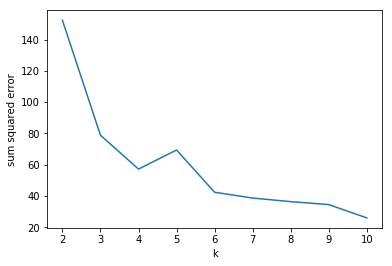

In [93]:
plot_k_sse(X, 2, 10)

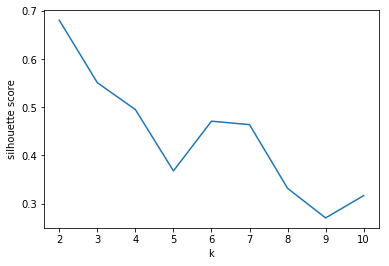

In [94]:
plot_k_silhouette(X, 2, 10)

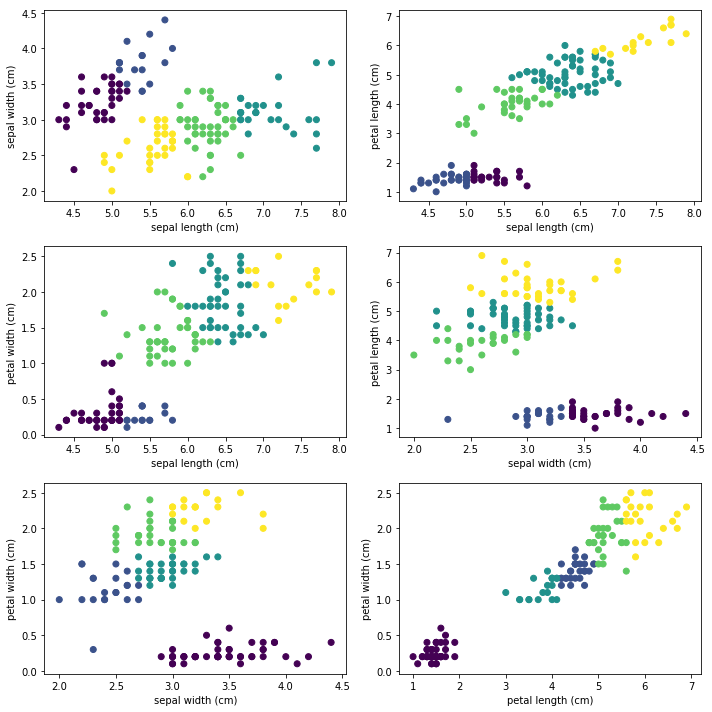

In [95]:
# plt.figure(figsize=(20, 20))
plot_all_2d(X, np.array(iris.feature_names), k=5)
plt.tight_layout()
plt.show()

***
***
***

## Clustering text data

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')

### K-Means

#### Load data from articles.pkl to DataFrame

In [97]:
articles_df = pd.read_pickle('articles.pkl')

In [98]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405 entries, 0 to 1404
Data columns (total 15 columns):
document_type      1405 non-null object
web_url            1405 non-null object
lead_paragraph     1405 non-null object
abstract           1001 non-null object
snippet            1405 non-null object
news_desk          1405 non-null object
word_count         1405 non-null object
source             1405 non-null object
section_name       1405 non-null object
subsection_name    954 non-null object
_id                1405 non-null object
pub_date           1405 non-null object
print_page         1379 non-null object
headline           1405 non-null object
content            1405 non-null object
dtypes: object(15)
memory usage: 175.6+ KB


In [99]:
articles_df.head()

,document_type,web_url,lead_paragraph,abstract,snippet,news_desk,word_count,source,section_name,subsection_name,_id,pub_date,print_page,headline,content
0,article,http://www.nytimes.com/2013/10/03/sports/footb...,You would think that in a symmetric zero-sum s...,None,You would think that in a symmetric zero-sum s...,Sports,347,The New York Times,Sports,Pro Football,524d4e3a38f0d8198974001f,2013-10-03T00:00:00Z,None,Week 5 Probabilities: Why Offense Is More Impo...,the original goal building model football fore...
1,article,http://www.nytimes.com/2013/10/03/us/new-immig...,House Democrats on Wednesday unveiled an immig...,House Democrats unveil immigration bill that p...,House Democrats on Wednesday unveiled an immig...,National,83,The New York Times,U.S.,None,524cf71338f0d8198973ff7b,2013-10-03T00:00:00Z,21,New Immigration Bill Put Forward,house unveiled immigration bill provides path ...
2,article,http://www.nytimes.com/2013/10/03/us/arizona-j...,A federal judge on Wednesday ordered the appoi...,Federal Judge Murray Snow orders the appointme...,A federal judge on Wednesday ordered the appoi...,National,160,The New York Times,U.S.,None,524cf50e38f0d8198973ff79,2013-10-03T00:00:00Z,21,Arizona: Judge Orders Monitor to Oversee Maric...,federal judge wednesday ordered appointment in...
3,article,http://www.nytimes.com/2013/10/03/us/texas-sta...,Texas has turned to a compounding pharmacy to ...,"Documents show that Texas, nation's most activ...",Texas has turned to a compounding pharmacy to ...,National,112,The New York Times,U.S.,None,524cf39a38f0d8198973ff78,2013-10-03T00:00:00Z,21,Texas: State Bought Execution Drugs From a Com...,texas nation’s active death-penalty state turn...
4,article,http://www.nytimes.com/2013/10/03/sports/tenni...,"Rafael Nadal, aiming to end Novak Djokovic’s r...",None,"Rafael Nadal, aiming to end Novak Djokovic’s r...",Sports,49,The New York Times,Sports,Tennis,524cf28b38f0d8198973ff73,2013-10-03T00:00:00Z,14,Nadal on Track for No. 1 Spot,rafael nadal aiming end novak djokovic’s run 1...


#### Vectorize the article content as tf-idf

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(articles_df['content']) # fit_transform() 的參數要是一個 list
features = vectorizer.get_feature_names()

In [101]:
len(features)

34043

In [102]:
features

['00',
 '000',
 '0000',
 '0008',
 '000th',
 '001st',
 '005',
 '0077',
 '01',
 '0106',
 '014',
 '018',
 '02',
 '03',
 '0313',
 '0363',
 '04',
 '0440',
 '045',
 '046',
 '05',
 '051',
 '06',
 '0600',
 '061',
 '069',
 '07',
 '0736',
 '08',
 '080',
 '083',
 '088',
 '09',
 '0986',
 '10',
 '100',
 '100th',
 '101',
 '101st',
 '102',
 '103',
 '103rd',
 '104',
 '105',
 '105th',
 '106',
 '1063',
 '107',
 '107th',
 '108',
 '108th',
 '109',
 '10k',
 '10th',
 '11',
 '110',
 '1100s',
 '1109',
 '111',
 '111th',
 '112',
 '113',
 '1133',
 '114',
 '114th',
 '115',
 '116',
 '1160',
 '116th',
 '117',
 '118',
 '119',
 '11th',
 '12',
 '120',
 '121',
 '1212',
 '122',
 '122nd',
 '123',
 '124',
 '125',
 '1258',
 '126',
 '127',
 '128',
 '129',
 '12th',
 '13',
 '130',
 '131',
 '1315',
 '132',
 '133',
 '134',
 '135',
 '136',
 '1368',
 '137',
 '1371',
 '138',
 '139',
 '13th',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '14th',
 '15',
 '150',
 '1500',
 '150th',
 '151',
 '1

#### Apply k-means clustering to the vectors

1. 先分群
2. 找出每一群的中心點，是一個 vector
3. 把中心點的 vector 找出每個 feature 所對應的單字，該單字可以看成是 cluster 的平均值

In [103]:
from sklearn.cluster import KMeans

kmeans = KMeans()
kmeans.fit(X) # 從輸出知道預設是被分成 8 群

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Inspect the centroids

中心點的 vector 只是一個 tf-idf 所組成的 vector，要 map 回單字的空間找出是哪個單字

In [104]:
print('cluster centers:')
print(kmeans.cluster_centers_)

cluster centers:
[[0.00000000e+00 8.77992538e-03 2.48723339e-04 ... 1.45338840e-04
  8.47066689e-05 0.00000000e+00]
 [2.11703654e-03 5.94454516e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.25823024e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 1.12074994e-02 0.00000000e+00 ... 0.00000000e+00
  6.58680671e-04 0.00000000e+00]
 [0.00000000e+00 5.92924563e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.67906654e-03]
 [0.00000000e+00 2.28778265e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [105]:
kmeans.cluster_centers_.shape # 有 8 個 row 對應到 8 個中心點, 34043 個 features (單字)

(8, 34043)

In [106]:
kmeans.cluster_centers_.argsort()[:,-1:-11:-1] # 每一個 row 前十大 tf-idf 的 index

array([[20341, 26501, 20886,  6633, 33769, 20346, 17987, 33546,  2566,
        28892],
       [33739, 12645, 26003, 15667, 27045, 26354, 22831, 14474, 26501,
        19598],
       [16079, 26251, 16081, 21277, 20341, 21356, 16178, 31884, 20849,
        23726],
       [26501, 20341,  2801, 21513, 13265, 29932, 31884, 22639, 23276,
        27096],
       [22653, 22359, 13265,  3271, 26501, 20341, 18956, 24712, 19530,
         9981],
       [25513, 14152, 14749,  5329, 13265, 17631, 27692, 21356, 27191,
        20341],
       [30209, 12645,  7845, 26501, 27045, 23138, 24486, 17676, 33769,
        28657],
       [33749, 30923, 12645, 24377, 30209, 12964, 27045, 18822, 28131,
        16442]])

In [107]:
features[25513], features[33546]

('republican', 'work')

#### Find the top 10 features for each cluster

要由 vector 回去找對應的單字 (feature)

In [108]:
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1] # 選出 tf-idf 最大的前十名，argsort() 是遞增排列，所以 list 中要用倒序
print('Top features for each cluster:')
for num, centroid in enumerate(top_centroids): # 有 8 群，所以 num 是 0 ~ 7
    print('%d: %s' % (num, ', '.join(features[i] for i in centroid)))

Top features for each cluster:
0: mr, said, new, company, year, ms, like, work, art, state
1: yankee, game, rivera, inning, season, run, pettitte, hit, said, mets
2: iran, rouhani, iranian, nuclear, mr, obama, israel, united, netanyahu, president
3: said, mr, attack, official, government, syria, united, people, police, security
4: percent, party, government, bank, said, mr, market, rate, merkel, economy
5: republican, health, house, care, government, law, shutdown, obama, senate, mr
6: team, game, cup, said, season, player, race, league, year, sport
7: yard, touchdown, game, quarterback, team, giant, season, manning, smith, jet


#### Limit the number of features and see if the words of the topics change

這定最多有幾個 features，可以降低 noise，讓中心點所代表的東西更有意義

這邊的程式碼跟上面一樣，只是 `TfidfVectorizer()` 多了一個參數 `max_features=1000`

In [109]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(articles_df['content']) # X 是 tf-idf 表格
features = vectorizer.get_feature_names()
kmeans = KMeans()
kmeans.fit(X) # 這邊的 X 會被拿去分群，並計算中心點
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print('Top features for each cluster with 1000 max features:')
for num, centroid in enumerate(top_centroids):
    print('%d: %s' % (num, ', '.join(features[i] for i in centroid)))

Top features for each cluster with 1000 max features:
0: new, said, sept, year, ms, like, art, people, world, work
1: yard, touchdown, game, quarterback, giant, team, season, smith, jet, play
2: mr, said, court, music, ms, year, opera, judge, case, new
3: republican, health, house, care, government, law, obama, senate, shutdown, mr
4: percent, said, company, china, bank, year, government, market, million, state
5: iran, rouhani, iranian, nuclear, mr, obama, israel, united, president, netanyahu
6: game, team, season, said, player, yankee, league, rivera, cup, year
7: said, attack, government, syria, official, police, united, mr, people, killed


#### Print out the titles of a random sample of the articles assigned to each cluster to get a sense of the topic.

`kmeans.fit(X)` 是把 X 拿去分群，計算中心點，但是這動作結束後 X 本身仍然是分群前的 X

用 `kmeans.transform(X)` 計算每一筆數據與每個 cluster 中心點的距離

`argmin()` 傳回沿著軸的方向最小的數值的 index

In [110]:
assigned_cluster = kmeans.transform(X).argmin(axis=1)

# assigned_cluster = kmeans.predict(X)

In [111]:
print(X.shape)
print(kmeans.transform(X).shape) # 被分成了 8 群，所以每一筆數據會拿去算和 8 個中心點的距離
print(kmeans.transform(X)) # 列出每一筆與每個中心點的距離

(1405, 1000)
(1405, 8)
[[0.99047236 0.92634264 1.03739905 ... 1.21933865 0.94151788 1.04594242]
 [1.00464503 1.14830551 1.03984808 ... 1.21574772 1.07831688 1.02063693]
 [0.99234135 1.1442421  1.01083652 ... 1.21327485 1.06929562 1.03040181]
 ...
 [0.98906902 1.12985746 1.010143   ... 1.15473782 1.05996223 0.87711516]
 [0.91079577 1.08575794 0.92681567 ... 1.15685077 0.9872074  0.96055258]
 [0.9526407  1.09814241 0.98305053 ... 1.18889845 1.02131766 1.00921791]]


In [112]:
assigned_cluster # 表示該數據與第幾個 cluster 中心點的距離最小

array([1, 3, 0, ..., 7, 4, 0])

In [113]:
kmeans.predict(X) # 結果和 assigned_cluster 一樣

array([1, 3, 0, ..., 7, 4, 0], dtype=int32)

In [114]:
cluster = np.arange(0, X.shape[0])[assigned_cluster==0]
cluster

array([   2,    3,    4,    5,    7,    9,   10,   11,   13,   14,   15,
         16,   19,   23,   25,   27,   40,   41,   51,   53,   54,   60,
         64,   66,   70,   75,   76,   77,   88,   89,   94,   99,  102,
        104,  110,  111,  114,  115,  119,  120,  124,  130,  135,  138,
        139,  142,  144,  147,  150,  153,  163,  171,  174,  175,  177,
        179,  181,  182,  186,  188,  189,  191,  193,  198,  203,  212,
        213,  214,  216,  217,  219,  220,  222,  223,  224,  226,  236,
        238,  239,  240,  241,  250,  251,  252,  257,  258,  265,  266,
        268,  269,  270,  271,  275,  277,  279,  283,  297,  299,  306,
        308,  320,  324,  325,  332,  333,  334,  335,  336,  338,  339,
        340,  351,  353,  356,  359,  362,  372,  373,  374,  375,  376,
        378,  380,  382,  384,  389,  395,  401,  421,  422,  423,  424,
        426,  428,  431,  433,  437,  438,  440,  445,  449,  455,  458,
        463,  466,  468,  472,  474,  475,  479,  4

In [115]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i] # assigned_cluster==i 會挑出第 i 個 cluster 的 row
    sample_articles = np.random.choice(cluster, 3, replace=False)
    print('cluster %d:' % i)
    for article in sample_articles:
        print('    %s' % articles_df.loc[article]['headline'])

cluster 0:
    What’s On Saturday
    O’Neal Buys a Stake in the Kings
    In Ratings War, ‘G.M.A.’ Beats ‘Today’ for Full Season
cluster 1:
    Jets (2-1) at Titans (2-1)
    Week 3 N.F.L. Matchups
    Week 4 N.F.L. Matchups
cluster 2:
    A Late-Career Legal Niche After the Hussein Trial
    Diving Into the Past, They Land in the Present
    Regulations May Be Snag in U.S.-Europe Trade Talks
cluster 3:
    Excuses, Excuses, Excuses
    Republicans See Keystone Pipeline as a Card to Play in Last-Minute Fiscal Talks
    Justice Department Poised to File Lawsuit Over Voter ID Law
cluster 4:
    A Climate Change Showdown as Global Officials Meet
    Population Control Is Called Big Revenue Source in China
    Euro Zone Business Activity Rises
cluster 5:
    Discussing Iran, Obama and Netanyahu Display Unity
    U.S. and Iran 
Agree to Speed
Talks to Defuse
Nuclear Issue
    Between Martyrdom and Diplomacy
cluster 6:
    Throw Home Caps a Giant’s Homecoming
    Oracle Sweeps Two Races to 

#### If you set `k==` to the number of NYT sections in the dataset, does it return topics that map to a section?

In [116]:
from collections import Counter

In [117]:
kmeans = KMeans(n_clusters=10) # 這次改分成 10 群
kmeans.fit(X)
assigned_cluster = kmeans.transform(X).argmin(axis=1)
print('Top 2 topics for each cluster')
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i] # cluster 是一個 list
    topics = articles_df.loc[cluster].dropna()['section_name'] # 挑出所有符合該 cluster 的 row 若該 row 有空值就丟掉，然後從剩下的裡面看 section_name 欄位
    most_common = Counter(topics).most_common()
    if len(most_common) > 1:
        print('Cluster %d: %s' % (i, most_common[0][0]), ', %s' % (most_common[1][0]))

Top 2 topics for each cluster
Cluster 0: Sports , World
Cluster 1: U.S. , Opinion
Cluster 2: World , Sports
Cluster 3: World , Opinion
Cluster 5: World , U.S.
Cluster 6: Sports , Opinion
Cluster 7: Business Day , World
Cluster 8: World , Opinion
Cluster 9: Arts , Business Day


#### Try clustering with a subset of the sections

In [118]:
# Create masks
cond_sports = articles_df['section_name'] == 'Sports'
cond_arts = articles_df['section_name'] == 'Arts'
cond_business_day = articles_df['section_name'] == 'Business Day'

In [119]:
three_articles_df = articles_df[cond_sports | cond_arts | cond_business_day]

In [120]:
three_articles_df

,document_type,web_url,lead_paragraph,abstract,snippet,news_desk,word_count,source,section_name,subsection_name,_id,pub_date,print_page,headline,content
0,article,http://www.nytimes.com/2013/10/03/sports/footb...,You would think that in a symmetric zero-sum s...,None,You would think that in a symmetric zero-sum s...,Sports,347,The New York Times,Sports,Pro Football,524d4e3a38f0d8198974001f,2013-10-03T00:00:00Z,None,Week 5 Probabilities: Why Offense Is More Impo...,the original goal building model football fore...
4,article,http://www.nytimes.com/2013/10/03/sports/tenni...,"Rafael Nadal, aiming to end Novak Djokovic’s r...",None,"Rafael Nadal, aiming to end Novak Djokovic’s r...",Sports,49,The New York Times,Sports,Tennis,524cf28b38f0d8198973ff73,2013-10-03T00:00:00Z,14,Nadal on Track for No. 1 Spot,rafael nadal aiming end novak djokovic’s run 1...
5,article,http://www.nytimes.com/2013/10/03/sports/socce...,A Brazilian labor judge ordered the suspension...,None,A Brazilian labor judge ordered the suspension...,Sports,49,The New York Times,Sports,Soccer,524ced7138f0d8198973ff67,2013-10-03T00:00:00Z,14,Judge Halts Work on World Cup Stadium,brazilian labor judge ordered suspension const...
6,article,http://www.nytimes.com/2013/10/03/sports/socce...,Defending champion Bayern Munich produced a po...,"Bayern Munich beats Manchester City, 3-1, in U...",Defending champion Bayern Munich produced a po...,Sports,190,The New York Times,Sports,Soccer,524ce87638f0d8198973ff59,2013-10-03T00:00:00Z,14,Bayern Munich Dominates Manchester City,defending champion bayern munich produced powe...
7,article,http://www.nytimes.com/2013/10/03/sports/ameri...,Simone Biles used superb floor and vault exerc...,American Simone Biles sweeps past teammate Kyl...,Simone Biles used superb floor and vault exerc...,Sports,49,The New York Times,Sports,None,524cebfb38f0d8198973ff5f,2013-10-03T00:00:00Z,14,American Leads in World Gymnastics All-Around,simone bile used superb floor vault exercise s...
8,article,http://www.nytimes.com/2013/10/03/sports/hocke...,The Devils announced that Cory Schneider would...,New Jersey Devils announce that Cory Schneider...,The Devils announced that Cory Schneider would...,Sports,110,The New York Times,Sports,Hockey,524ceb0338f0d8198973ff5c,2013-10-03T00:00:00Z,14,Brodeur’s Starting Streak to End,the devil announced cory schneider would start...
9,article,http://www.nytimes.com/2013/10/03/sports/vonn-...,Lindsey Vonn’s surgically repaired right knee ...,Lindsey Vonn announces that her surgically rep...,Lindsey Vonn’s surgically repaired right knee ...,Sports,61,The New York Times,Sports,None,524ce70738f0d8198973ff58,2013-10-03T00:00:00Z,14,Vonn Is Close to Returning,lindsey vonn’s surgically repaired right knee ...
10,article,http://www.nytimes.com/2013/10/03/sports/whitn...,The Whitney Handicap winner Cross Traffic will...,Whitney Handicap winner Cross Traffic will not...,The Whitney Handicap winner Cross Traffic will...,Sports,37,The New York Times,Sports,None,524ce3b538f0d8198973ff53,2013-10-03T00:00:00Z,14,Whitney Winner Out of Breeders’ Cup Classic,the whitney handicap winner cross traffic run ...
12,article,http://www.nytimes.com/2013/10/03/business/ene...,"Clean Energy Fuels is selling Redeem, a vehicl...","Clean Energy Fuels is selling Redeem, vehicle ...","Clean Energy Fuels is selling Redeem, a vehicl...",Business,743,The New York Times,Business Day,Energy & Environment,524ccb1738f0d8198973ff11,2013-10-03T00:00:00Z,9,Fuel From Landfill Methane Goes on Sale,farmer waste management company energy industr...
21,article,http://www.nytimes.com/2013/10/03/sports/hocke...,After years of financial troubles nearly cause...,"Phoenix Coyotes, following years of financial ...",After years of financial troubles nearly cause...,Sports,1194,The New York Times,Sports,Hockey,524cc19a38f0d8198973fef1,2013-10-03T00:00:00Z,15,"Finally Secure in the Desert, the Coyotes Devo...",glendale ariz. just three month ago phoenix co...


In [121]:
kmeans = KMeans(n_clusters=3)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(three_articles_df['content'])
kmeans.fit(X)
assigned_cluster = kmeans.transform(X).argmin(axis=1)
print('Top 2 topics for each cluster')
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    topics = three_articles_df.loc[cluster].dropna()['section_name']
    most_common = Counter(topics).most_common()
    print('Cluster %d: %s' % (i, most_common[0][0]))
    if len(most_common) > 1:
        print(' %s' % (most_common[1][0]))

Top 2 topics for each cluster
Cluster 0: Sports
 Arts
Cluster 1: Sports
 Arts
Cluster 2: Sports
 Arts


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


### Hierarchical Clustering

Kmeans 基本上距離都是用 euclidean distance 而不用 cosine similarity

#### Create a subset of the original articles by filtering the dataset to contain at least one article from each section and at most 100 total articles.

In [173]:
small_mask = np.zeros(len(articles_df)).astype(bool)
indices = np.arange(len(articles_df))
for category in articles_df['section_name'].unique():
    category_mask = (articles_df['section_name'] == category).values # 括號內是 Series 加上 .values 變成 numpy.ndarray
    new_index = np.random.choice(indices[category_mask]) # indices[category_mask] 選出符合該 category 的 row 的 index
    small_mask[new_index] = True

# for 迴圈跑完後 small_mask 會留下 10 筆數據分別屬於十個 section_name 滿足了 at least one article from each section 的要求
    
additional_indices = np.random.choice(indices[np.logical_not(small_mask)],
                                      100 - sum(small_mask),
                                      replace=False) # 從剩下的 index 裡面隨便挑 90 個 article
small_mask[additional_indices] = True # 現在 small_mask 有 10 + 90 = 100 articles
small_df = articles_df.loc[small_mask]

In [174]:
# Verify that this is good:
assert len(small_df) == 100
assert len(small_df['section_name'].unique()) == len(articles_df['section_name'].unique())

In [175]:
small_df.shape # 100 篇文章 15 個欄位

(100, 15)

#### First vectorize our articles

In [176]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
small_X = vectorizer.fit_transform(small_df['content'])
small_features = vectorizer.get_feature_names()

In [177]:
print(small_X.shape) # 100 篇文章，100 features
print(len(small_features)) # max_features = 100

(100, 100)
100


#### Before using scipy's Hierarchical clustering, we need to first find out how similar our vectors are to one another.

In [178]:
from scipy.spatial.distance import pdist, squareform

In [179]:
# now get pairwise distances
distxy = squareform(pdist(small_X.todense(), metric='cosine'))

In [180]:
print(len(pdist(small_X.todense(), metric='cosine'))) # 兩兩算 cosine similarity 所以是 C^{100}_{2} = 100!/(2!98!) = 4950
pdist(small_X.todense(), metric='cosine') # 輸出是一個 vector 很難看得懂是哪兩個的 cosine similarity

4950


array([1.        , 1.        , 0.96861454, ..., 0.76493608, 0.51005652,
       0.88563708])

In [181]:
print(distxy.shape)
distxy # 兩兩計算 cosine similarity 但是把結果寫成矩陣形式比較好懂

(100, 100)


array([[0.        , 1.        , 1.        , ..., 0.83790245, 0.97788292,
        0.94052993],
       [1.        , 0.        , 0.81284718, ..., 0.56918988, 0.91598756,
        0.9669619 ],
       [1.        , 0.81284718, 0.        , ..., 0.92725485, 0.91544754,
        0.87597462],
       ...,
       [0.83790245, 0.56918988, 0.92725485, ..., 0.        , 0.76493608,
        0.51005652],
       [0.97788292, 0.91598756, 0.91544754, ..., 0.76493608, 0.        ,
        0.88563708],
       [0.94052993, 0.9669619 , 0.87597462, ..., 0.51005652, 0.88563708,
        0.        ]])

In [182]:
# a = np.isfinite(distxy)
# for row in range(100):
#     for col in range(100):
#         if a[row, col] == False:
#             print(row, col)
# print(distxy[0][83])

#### Pass this matrix into scipy's linkage function to compute our hierarchical clusters.

In [183]:
from scipy.cluster.hierarchy import linkage

In [184]:
link = linkage(distxy, method='complete')

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


In [185]:
print(link.shape)
link # 只有 100 篇文章，所以只有 99 個 link，編號 > 100 的都是已經兩個或兩個以上合併的

(99, 4)


array([[  9.        ,  51.        ,   0.45554948,   2.        ],
       [  3.        ,  40.        ,   0.64205922,   2.        ],
       [ 74.        ,  98.        ,   0.76520079,   2.        ],
       [ 25.        ,  72.        ,   0.81389748,   2.        ],
       [ 69.        , 102.        ,   0.83275657,   3.        ],
       [ 12.        ,  96.        ,   0.8361942 ,   2.        ],
       [  1.        ,  93.        ,   0.87222429,   2.        ],
       [ 23.        , 100.        ,   0.89018341,   3.        ],
       [ 87.        ,  91.        ,   0.89757898,   2.        ],
       [ 56.        ,  57.        ,   0.93769609,   2.        ],
       [ 21.        ,  64.        ,   0.94483792,   2.        ],
       [104.        , 108.        ,   0.98830911,   5.        ],
       [ 15.        ,  28.        ,   1.00115867,   2.        ],
       [ 30.        ,  88.        ,   1.0045444 ,   2.        ],
       [ 11.        , 103.        ,   1.01008593,   3.        ],
       [ 66.        ,  81

#### Using scipy's dengrogram function plot the linkages as a hierarchical tree.

In [186]:
from scipy.cluster.hierarchy import dendrogram

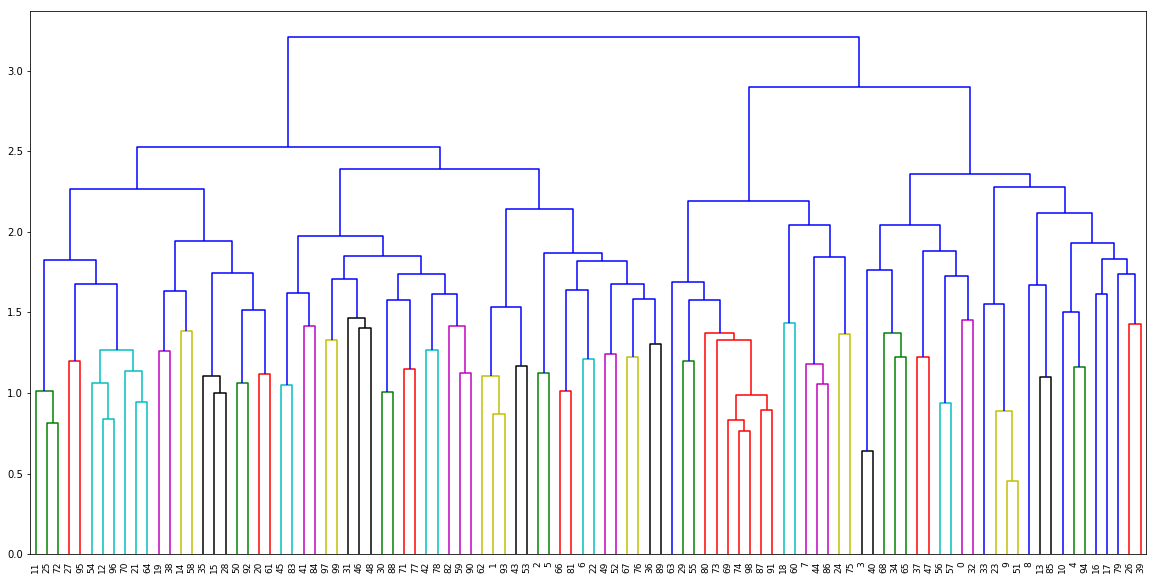

In [187]:
plt.figure(figsize=(20,10))
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=9)
plt.show()

### Hierarchical Topics

#### To make your clusters more interpretable, change the labels on the data to be the titles of the articles

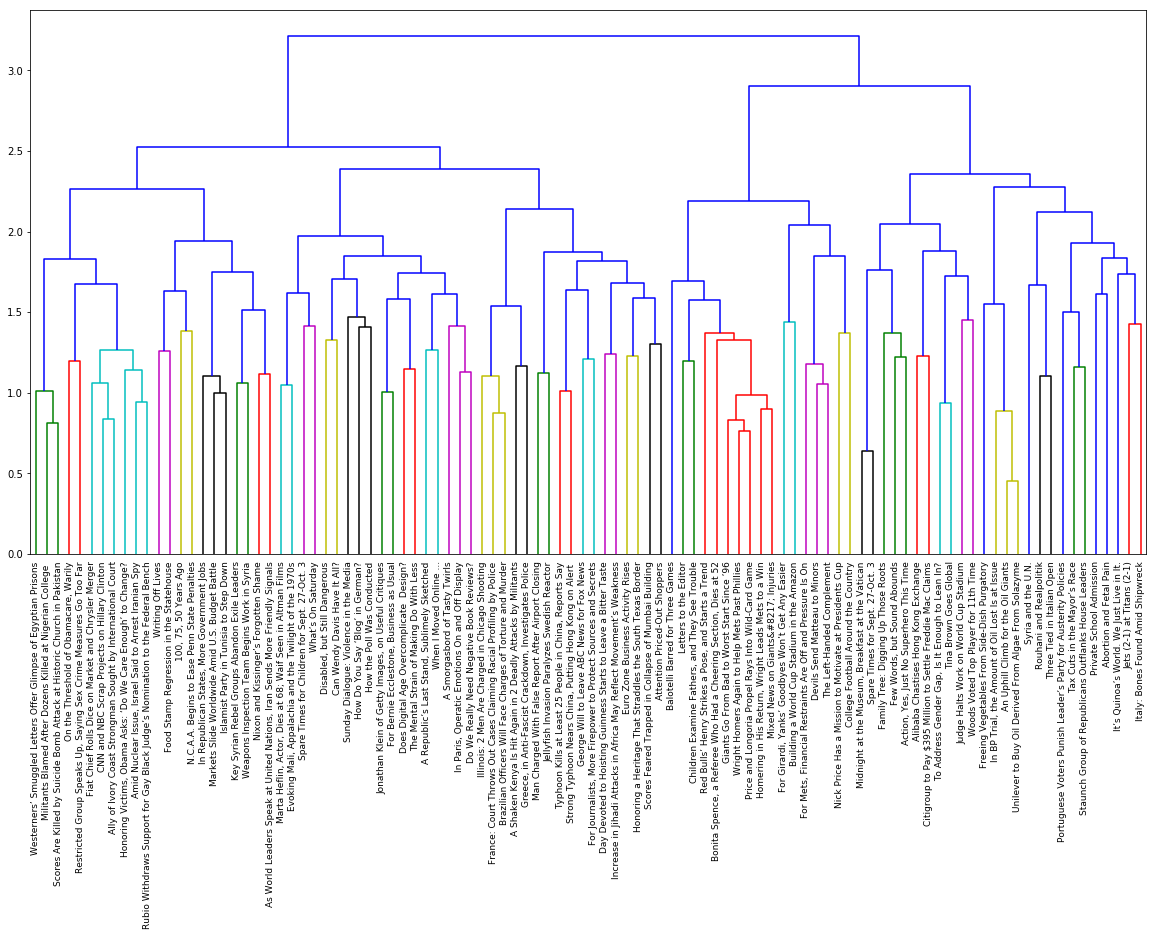

In [188]:
plt.figure(figsize=(20,10))
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=9,
                   labels=small_df['headline'].values)

#### Label each point with the title and the section

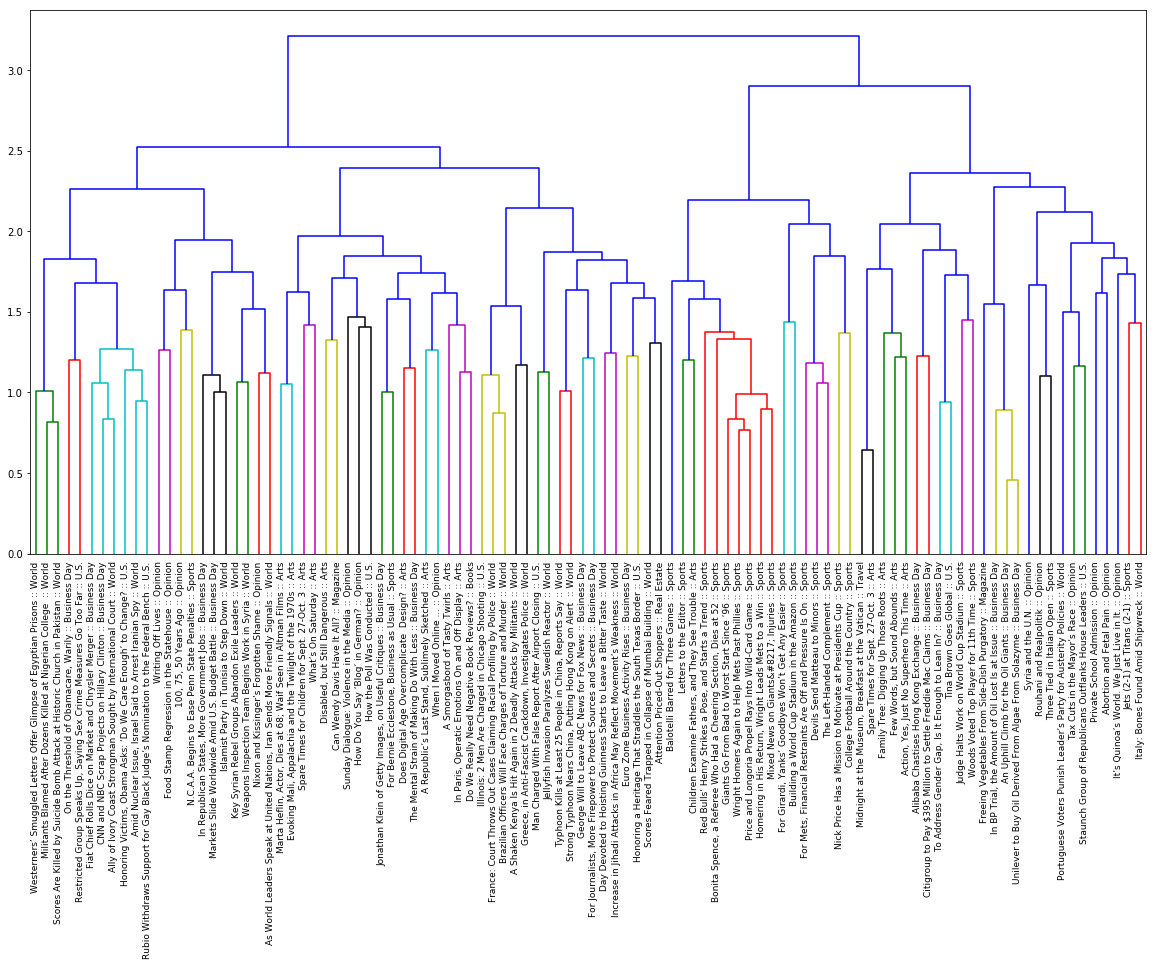

In [189]:
fig, ax = plt.subplots(1, figsize=(20, 10))
labels = (small_df['headline'] + ' :: ' + small_df['section_name']).values
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=9,
                    labels=labels)

重新畫圖，把圖片轉個方向

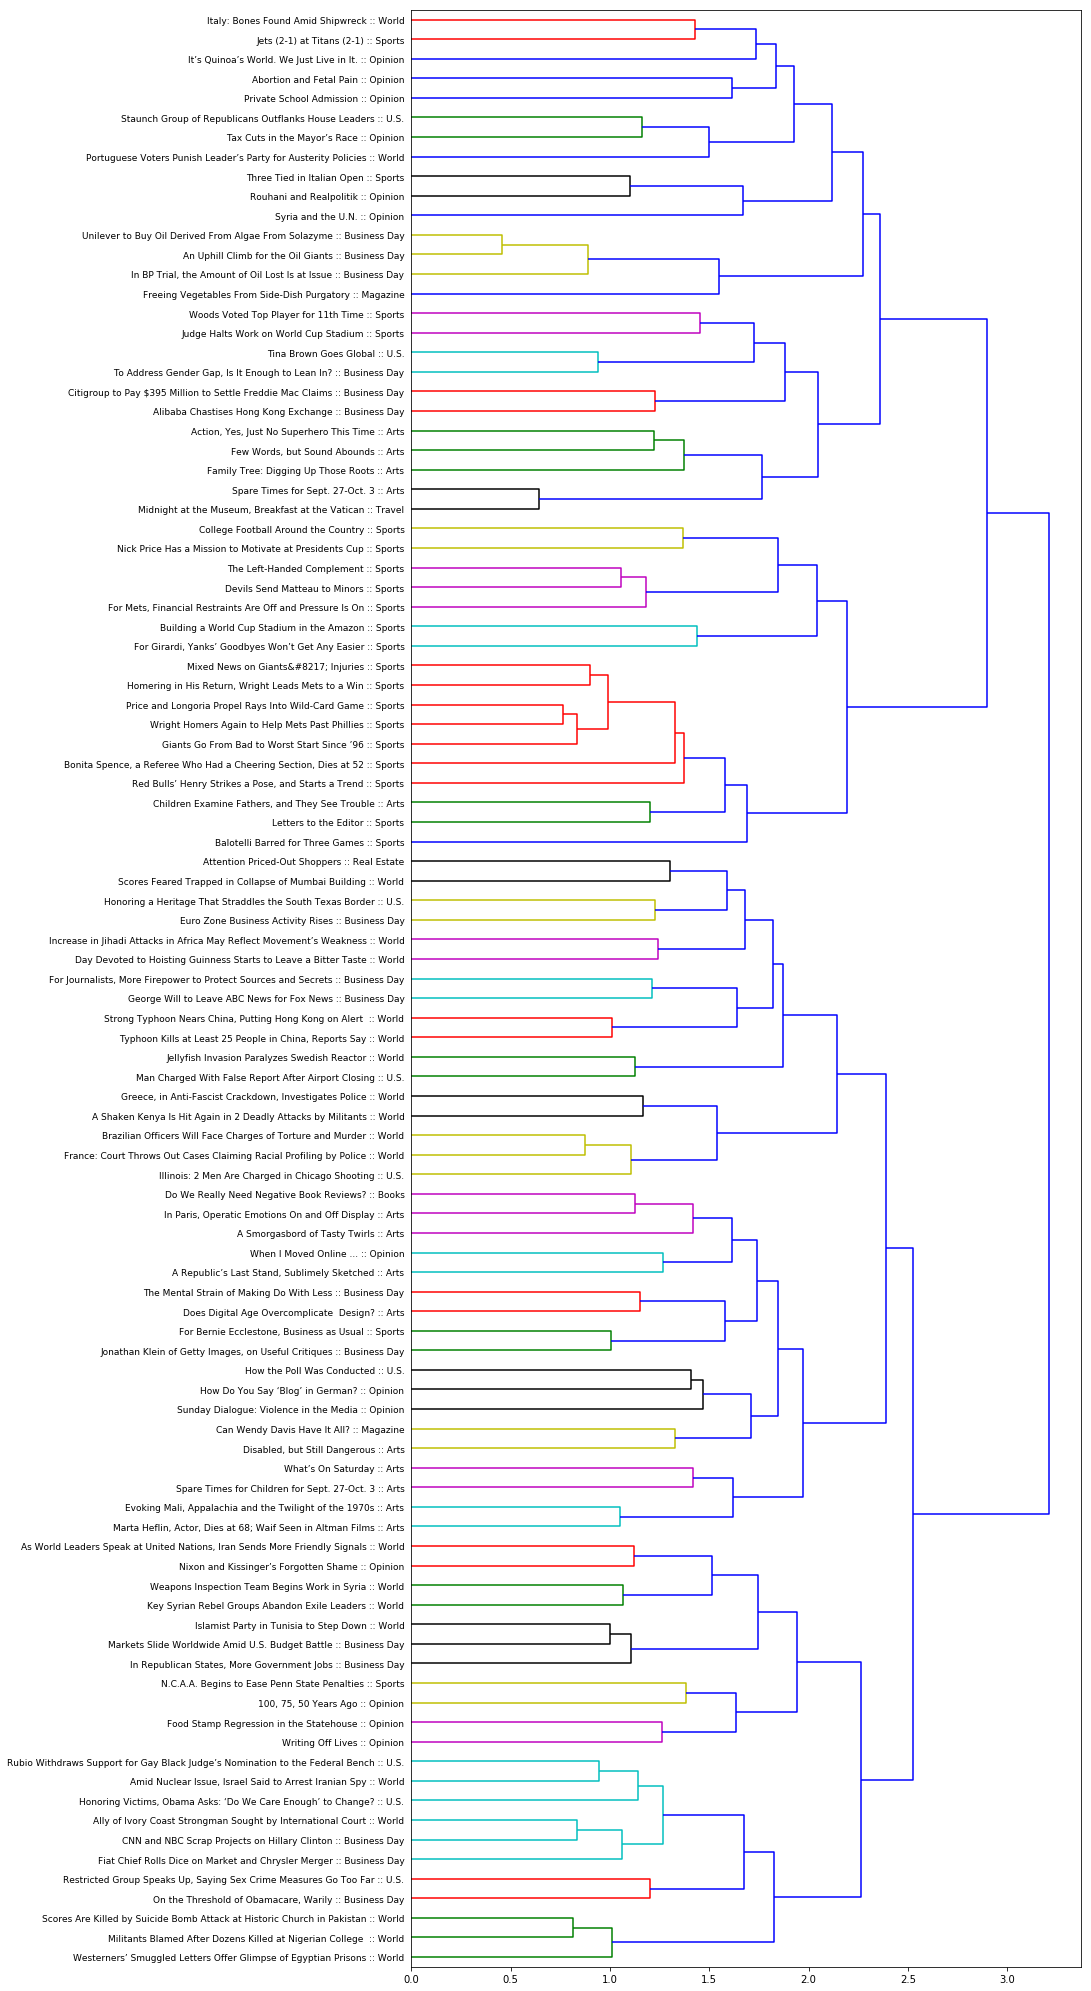

In [190]:
fig, ax = plt.subplots(1, figsize=(12, 36))

labels = (small_df['headline'] + ' :: ' + small_df['section_name']).values
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=9,
                    labels=labels, orientation='right')

#### Form flat clusters from linkage matrix by setting threshold

In [191]:
# form clusters from linkage matrix by setting threshold
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(link, t=1.4) # 在 1.4的地方砍一刀來分群

df_res = pd.DataFrame({'section_name':small_df['section_name'], 'clusters':clusters})
# prind(df_res)
df_res['count'] = 1
print(df_res[['section_name', 'count']].groupby(['section_name']).sum())
print(df_res[['clusters', 'count']].groupby(['clusters']).sum())
print(df_res[['clusters', 'section_name', 'count']].groupby(['clusters', 'section_name']).sum())

              count
section_name       
Arts             14
Books             1
Business Day     16
Magazine          2
Opinion          13
Real Estate       1
Sports           22
Travel            1
U.S.              9
World            21
          count
clusters       
1           100
                       count
clusters section_name       
1        Arts             14
         Books             1
         Business Day     16
         Magazine          2
         Opinion          13
         Real Estate       1
         Sports           22
         Travel            1
         U.S.              9
         World            21


In [192]:
clusters.shape

(100,)

In [193]:
df_res.head()

,section_name,clusters,count
5,Sports,1,1
25,World,1,1
38,U.S.,1,1
41,Travel,1,1
79,Opinion,1,1


#### Explore different clusters on a per section basis.

In [194]:
def plot_dendrogram_by_categorty(articles_df, category, n_articles=20):
    mask = articles_df['section_name'] == category # 找出符合 category 的 row
    cat_df = articles_df[mask].sample(n=n_articles) # 從中隨便選出 n_articles 筆 row
    
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    cat_X = vectorizer.fit_transform(cat_df['content']) # tf-idf 表格
    distxy = squareform(pdist(cat_X.todense(), metric='cosine')) # 算兩兩之間的 cosine similarity 將結果寫成矩陣
    fig, ax = plt.subplots(1, figsize=(6, 6))
    
    labels = cat_df['headline'].values
    # labels = (cat_df['headline'] + ' :: ' + cat_df['subsetion_name']).values
    
    dendro = dendrogram(linkage(distxy, method='complete'),
                        color_threshold=4,
                        leaf_font_size=8,
                        labels=labels,
                        orientation='right')
    ax.set_title(category)

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  del sys.path[0]


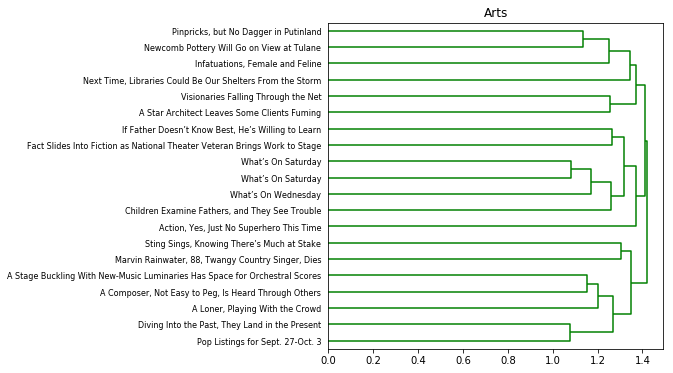

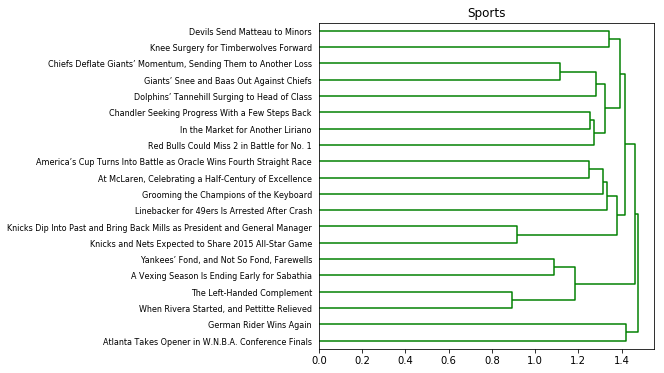

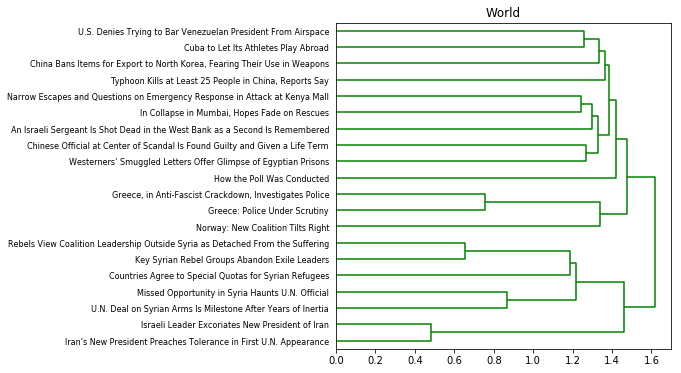

In [195]:
for category in ['Arts', 'Sports', 'World']:
    plot_dendrogram_by_categorty(articles_df, category)

#### Perform the same analysis as above and inspect the dendrogram with the words from the articles.

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


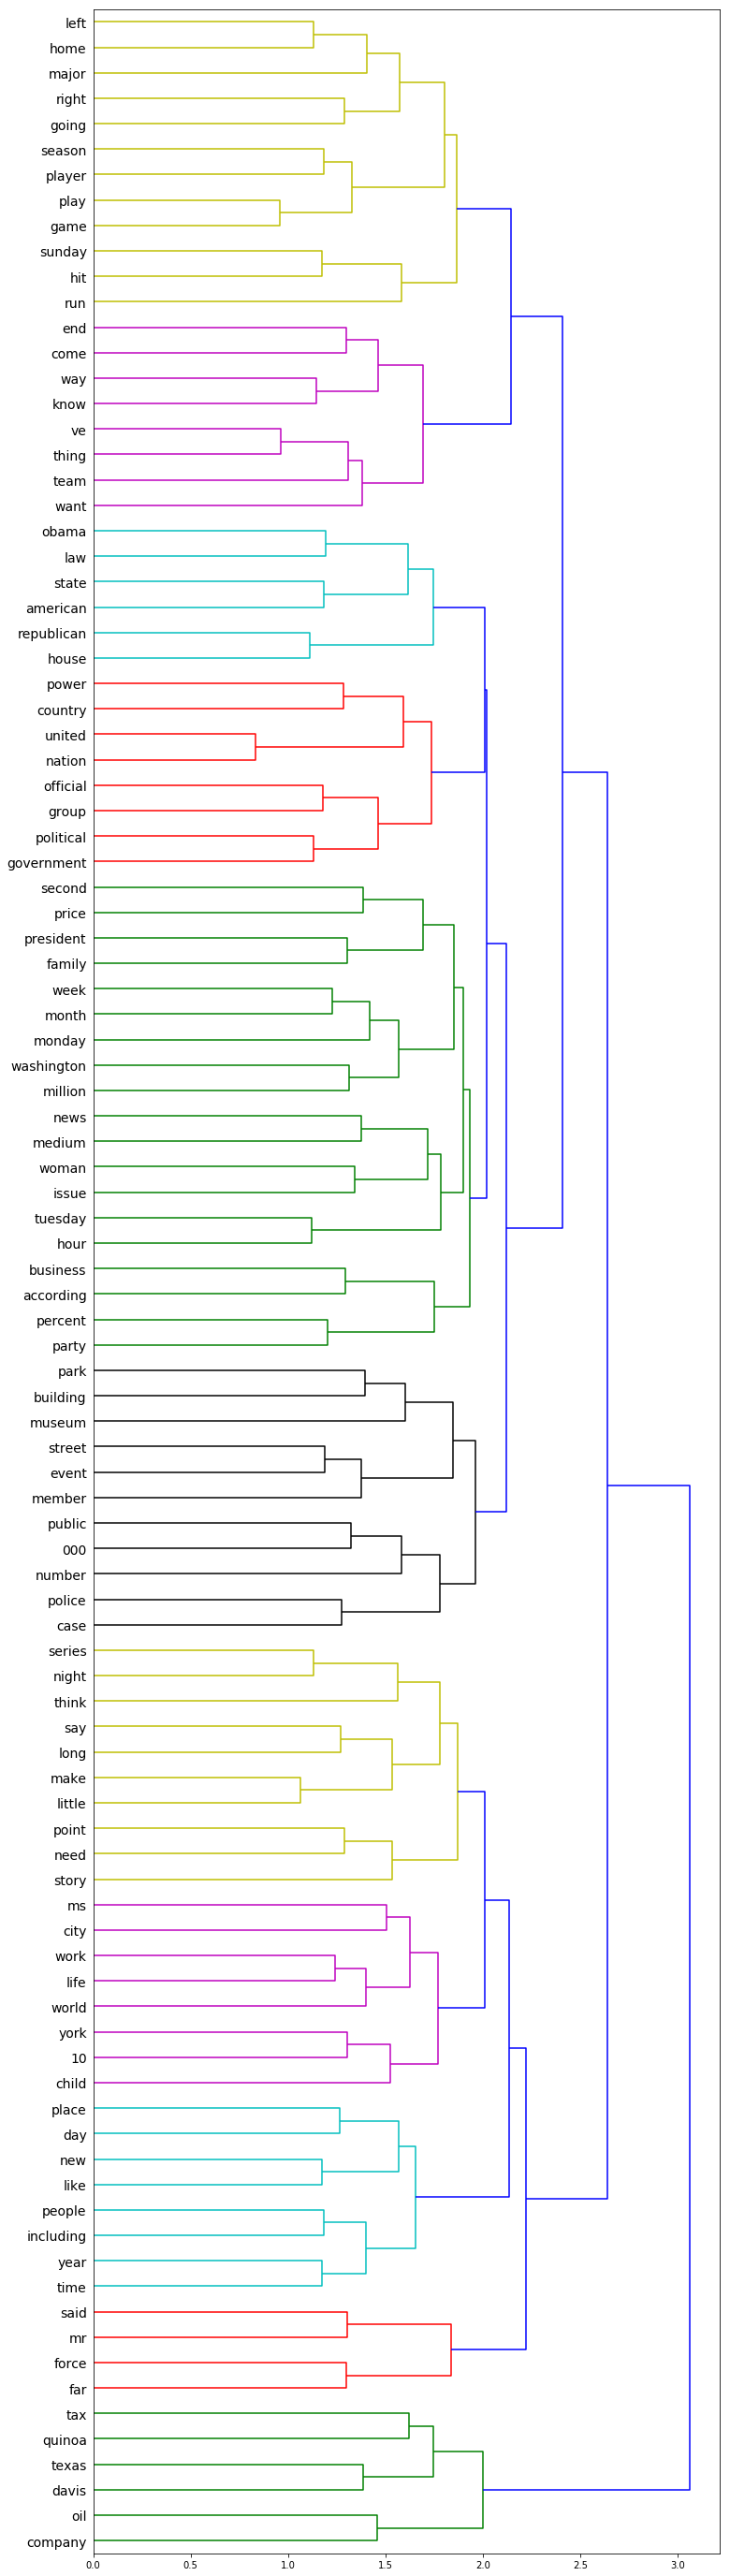

In [196]:
plt.figure(figsize=(12, 50))
distxy_words = squareform(pdist(small_X.T.todense(), metric='cosine'))
dendro = dendrogram(linkage(distxy_words, method='complete'),
                    color_threshold=2, leaf_font_size=14,
                    labels=small_features, orientation='right')